### Keras / Tensorflow Classification - Example
Here we're going to attempt to utilize Keras/Tensorflow to predict the whether or not an individual has cancer.

The data being used can be seen on my github below:

https://github.com/kaledev/PythonSnippets/blob/master/Datasets/Keras/cancer_classification.csv

#### Data Imports and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/cancer_classification.csv')

Here we can see the dataset is fairly well balanced in terms of classification of the labels, if the dataset was unbalanced then we might see issues with overfitting.

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

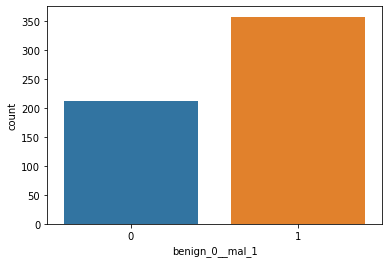

In [3]:
sns.countplot(x='benign_0__mal_1',data=df)

#### Create Models and Predict

In [4]:
#Set X/y
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

We need to scale the data so all features are in sync

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #Do not fit on testing to avoid overfitting/data leakage

Now we can create the Neural Network

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

We're going to define an early stop here to avoid overfitting and improve accuracy - With Early Stopping, Keras will not run the entirely defined amount of epochs if doing so will cause overfitting.

In [11]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [12]:
X_train.shape

(426, 30)

As we see 30 features here, we set the layers to be: <br />
Input: 30 <br />
Hidden: 15 (half) <br />
Output: 1

In [13]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5)) #Choose somewhere between 0/1 (1 = 100%) of neurons to turn off

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5)) #Choose somewhere between 0/1 (1 = 100%) of neurons to turn off

#BINARY CLASSIFICATION MUST BE SIGMOID
model.add(Dense(1, activation='sigmoid'))

#MUST BE binary_crossentropy
model.compile(loss='binary_crossentropy',optimizer='adam')

In [15]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

In [16]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

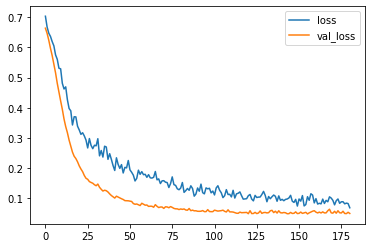

In [17]:
loss_df.plot()

In [20]:
predictions = model.predict_classes(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [23]:
print(confusion_matrix(y_test, predictions))

[[53  1]
 [ 2 87]]


You can see we came out with great results from this model with only 3 incorrectly diagnosed